In [91]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from tabulate import tabulate
from tqdm import tqdm
import warnings

# Preprocessing and feature engineering
from sklearn.preprocessing import (
    MinMaxScaler, StandardScaler, OneHotEncoder, Normalizer, PolynomialFeatures
)
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# Model selection and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    r2_score, mean_squared_error, mean_absolute_error,
    explained_variance_score, accuracy_score, precision_score,
    recall_score, f1_score
)

# Regression models
from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet, RANSACRegressor,
    BayesianRidge, HuberRegressor, ARDRegression, LassoLarsCV
)
from sklearn.ensemble import (
    RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor,
    BaggingRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor
)
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Classification models
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier,
    BaggingClassifier, ExtraTreesClassifier
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Pipelines
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.ensemble import StackingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import RANSACRegressor, LassoLarsCV


In [2]:
data = pd.read_csv("/content/laptop_data.csv")

In [3]:
data.head(3)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [4]:
data  = data[['Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [5]:
data.isnull().sum()


,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [7]:
catvars = data.select_dtypes(include=['object']).columns
numvars = data.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price'], dtype='object'))

In [8]:
'''
so on observation we can see that if we remove "GB" from RAM,i can
make it as an integer value then after,now same goes with Memory as
well as Weight,for Weight i can classify it as floating variable
using the str.replace() as shown ↓
'''

data['Ram'] = data['Ram'].str.replace('GB','')
data['Weight'] = data['Weight'].str.replace('kg','')

# converting from string->integer for ram column

data['Ram'] = data['Ram'].astype('int32')

# converting from string-> float for the weight column

data['Weight'] = data['Weight'].astype('float32')

data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


<ipython-input-9-229fa77945fd>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'],color='red')


<Axes: xlabel='Price', ylabel='Density'>

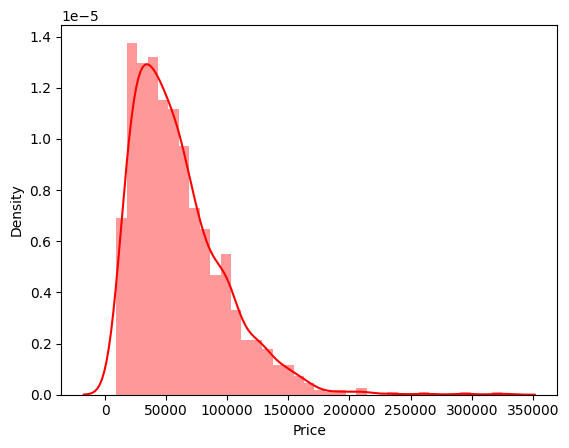

In [9]:
# viewing the distribution of the price column
import seaborn as sns
sns.distplot(data['Price'],color='red')

<ipython-input-10-c6e5ceefae71>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='plasma')
<ipython-input-10-c6e5ceefae71>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='plasma')
<ipython-input-10-c6e5ceefae71>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data[col],palette='plasma')
<ipython-input-10-c6e5ceefae71>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effec

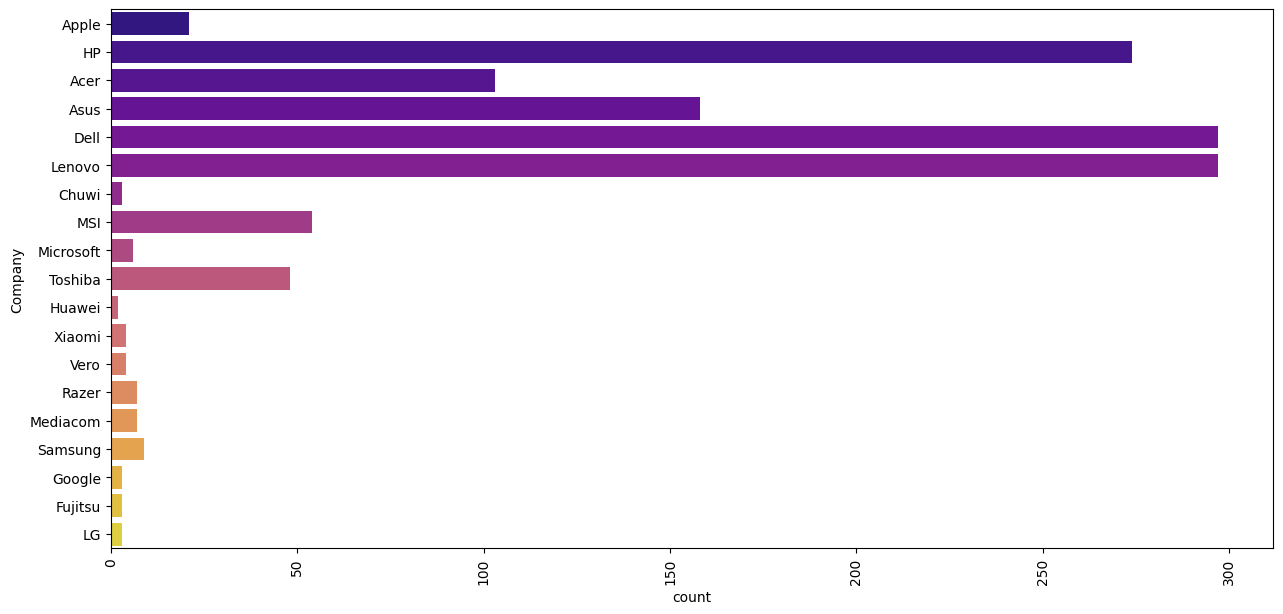

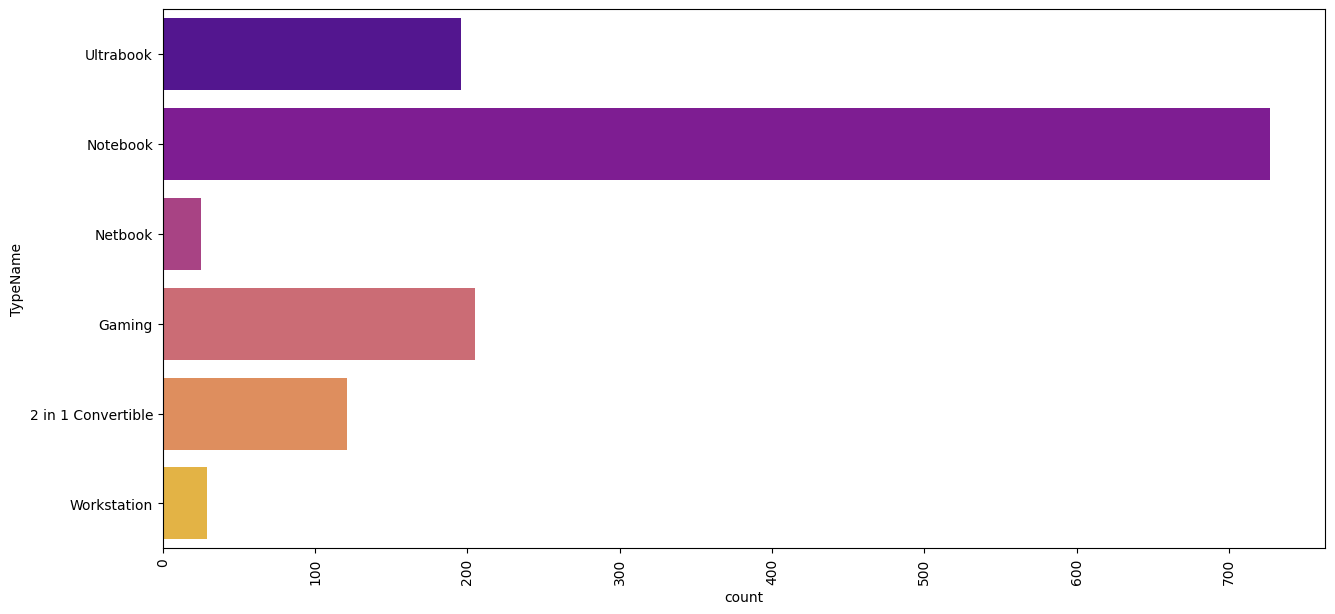

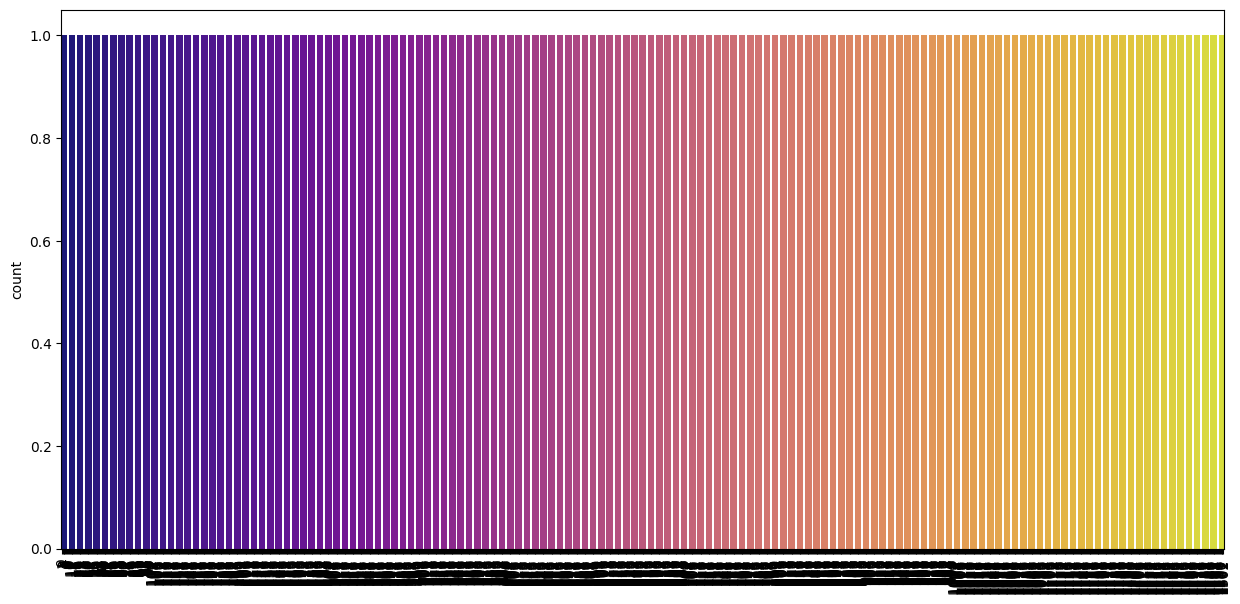

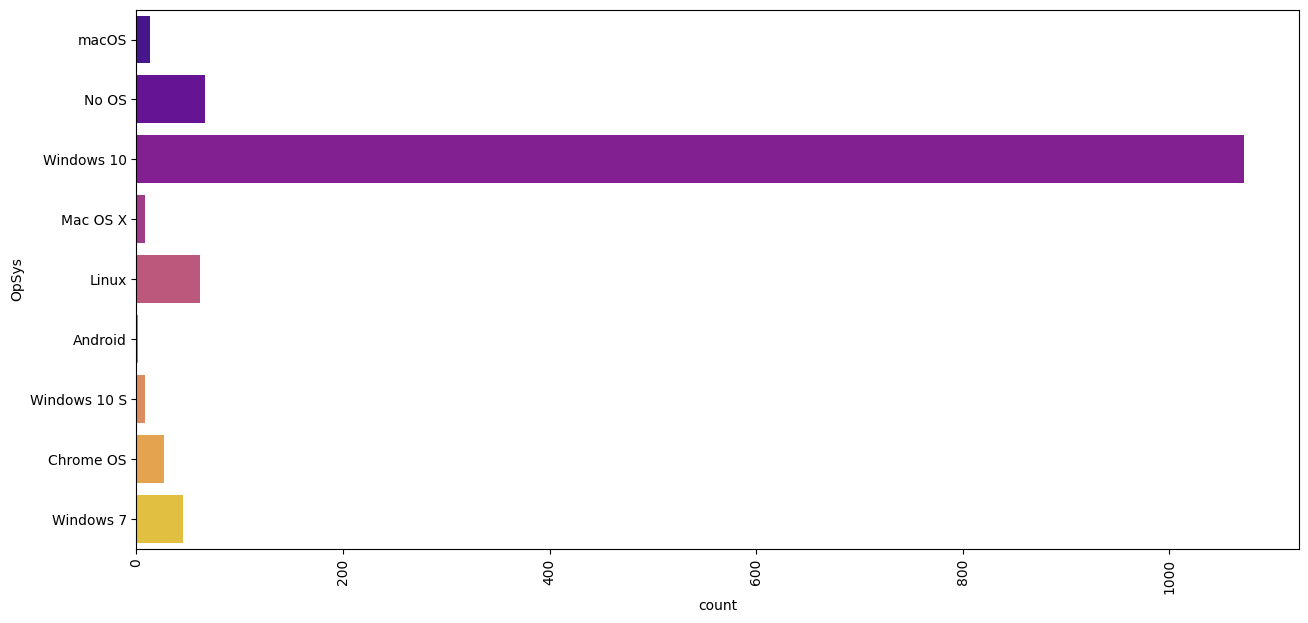

In [10]:
## plotting countplots for the categorical variables

def drawplot(col):
    plt.figure(figsize=(15,7))
    sns.countplot(data[col],palette='plasma')
    plt.xticks(rotation='vertical')

toview = ['Company', 'TypeName','Ram','OpSys']
for col in toview:
    drawplot(col)

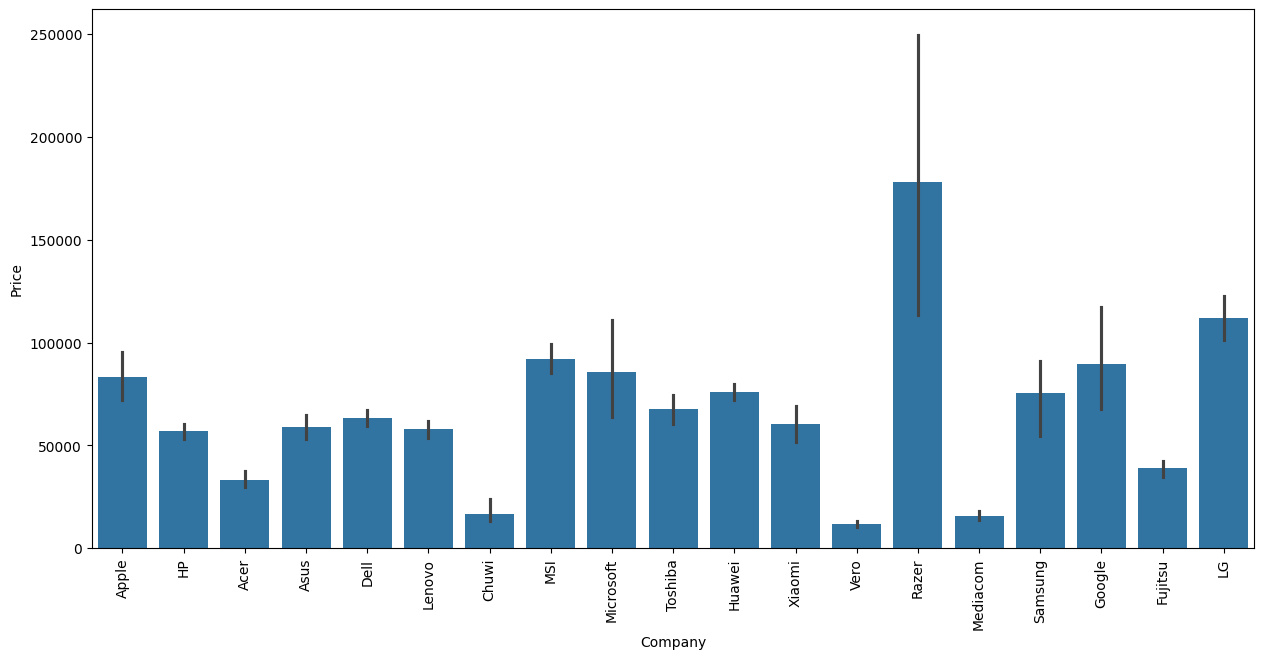

In [12]:
# average price for each of the laptop brands
# this will say us the insight that as per company the price of the laptop vary


plt.figure(figsize=(15,7))
sns.barplot(x = data['Company'],y = data['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

<ipython-input-13-48ddbdd1e4d8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['TypeName'],palette='autumn')


(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700'),
  Text(800.0, 0, '800')])

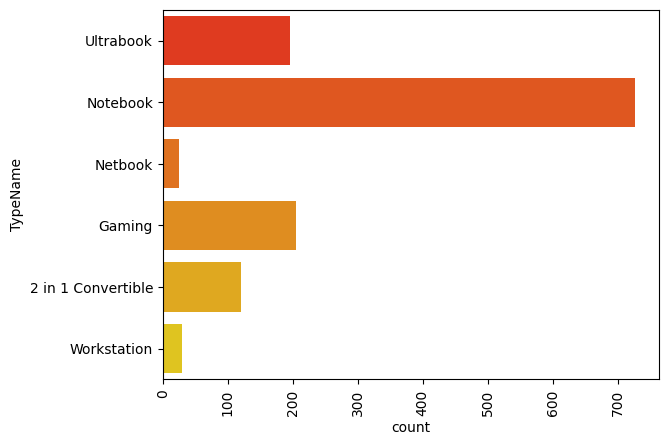

In [13]:
## various types of laptops

sns.countplot(data['TypeName'],palette='autumn')
plt.xticks(rotation = 'vertical')

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

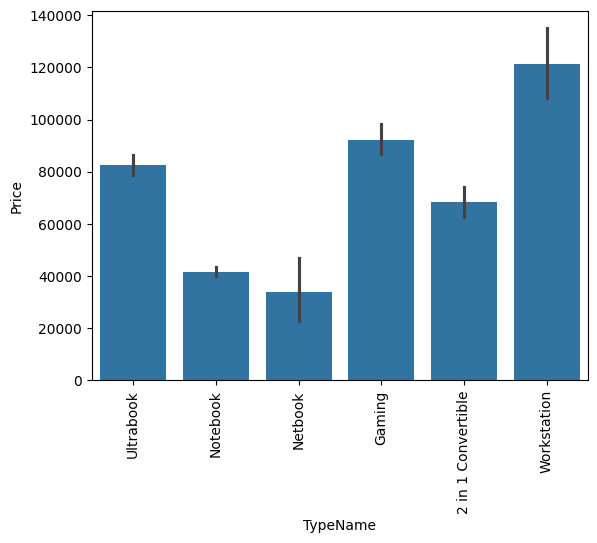

In [14]:
# laptop type and variation about the price

sns.barplot(x = data['TypeName'],y = data['Price'])
plt.xticks(rotation = 'vertical')



<Axes: xlabel='Inches', ylabel='Price'>

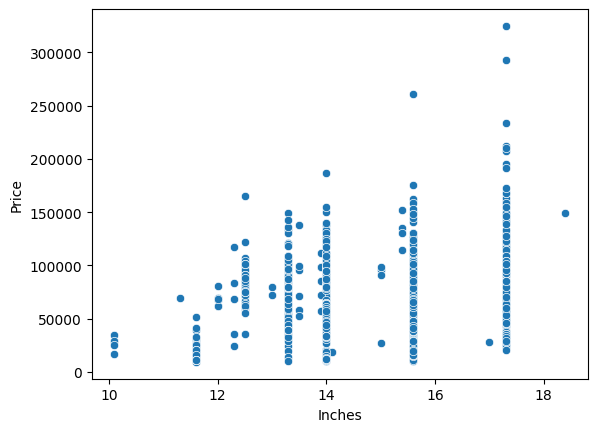

In [15]:

# variation of inches towards the price

sns.scatterplot(x = data['Inches'],y = data['Price'])

In [16]:
data['ScreenResolution'].value_counts()


,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [18]:
# creating a new col,touchscreen if the value is 1 that laptop is touch screen

data['TouchScreen'] = data['ScreenResolution'].apply(lambda element:1
                                                      if 'Touchscreen' in element else 0)

data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


<ipython-input-20-e2970f380f1d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['TouchScreen'],palette='plasma')


<Axes: ylabel='count'>

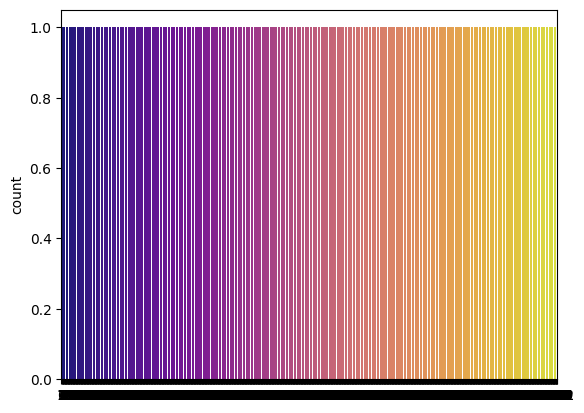

In [20]:
sns.countplot(data['TouchScreen'],palette='plasma')


([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

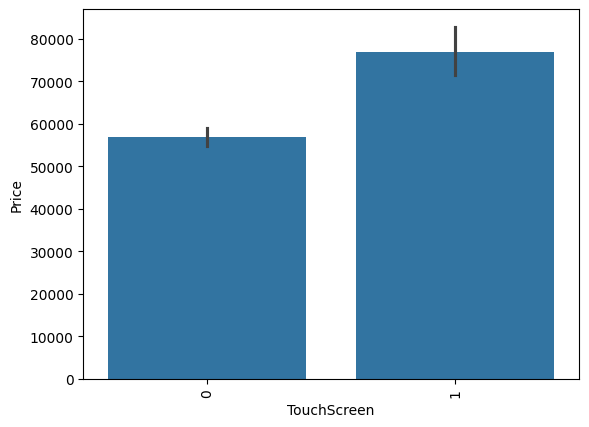

In [21]:
# touch screen on comparision with price of laptop

sns.barplot(x = data['TouchScreen'],y = data['Price'])
plt.xticks(rotation = 'vertical')

In [22]:
# creating a new col named IPS,does the laptop have IPS facility or not

data['IPS'] = data['ScreenResolution'].apply(
    lambda element:1 if "IPS" in element else 0
)
data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.00,0,0
216,Lenovo,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 940MX,No OS,2.80,31381.92,0,0
295,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.20,69210.72,0,1
267,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Intel HD Graphics 620,No OS,2.20,24881.76,0,0
480,Dell,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Nvidia GeForce 940MX,Windows 10,2.16,67239.36,0,1


<ipython-input-24-8b7226197063>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['IPS'],palette='plasma')


<Axes: ylabel='count'>

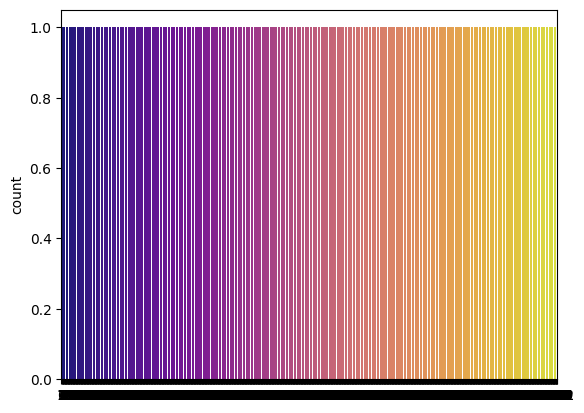

In [24]:
sns.countplot(data['IPS'],palette='plasma')


([0, 1], [Text(0, 0, '0'), Text(1, 0, '1')])

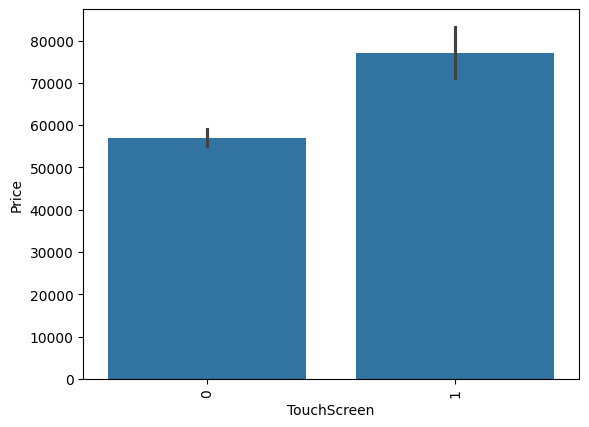

In [25]:
# price variation with respect to the IPS col

sns.barplot(x = data['TouchScreen'],y = data['Price'])
plt.xticks(rotation = 'vertical')

# Extracting the X Resolution and the Y Resolution


In [26]:
# we will split the text at the "x" letter and seperate the 2 parts
# from this we can observe that one of the col is Y res we need to do
# some feature engineering on the X res col

splitdf = data['ScreenResolution'].str.split('x',n = 1,expand=True)
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [27]:
splitdf = data['ScreenResolution'].str.split('x',n = 1,expand=True)

data['X_res'] = splitdf[0]
data['Y_res'] = splitdf[1]
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [28]:
'''
So basically from that whole text of the X_res col,we need to
extract the digits from it,but the problem is the numbers are scattered
in some cases,that is the reason why i am using regex,if we use this
we will exactly get the numbers which we are looking for!,
so firstly replace all the "," with "" and then find all numbers
from that string as "\d+\.?\d+",\d means that integer number and \.?
all the numbers which come after an number and \d+ the string must end with number


'''


data['X_res'] = data['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [29]:
data['X_res'] = data['X_res'].astype('int')
data['Y_res'] = data['Y_res'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [31]:
data['PPI'] = (((data['X_res']**2+data['Y_res']**2))**0.5/data['Inches']).astype('float')
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [32]:
data.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [33]:
data['CPU_name'] = data['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
data.head()


,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [34]:
'''
As mentioned earlier,if we get any of the intel `i3,i5 or i7` versions
we will return them as it is,but if we get any other processor
we will first check whether is that a variant of the intel? or not
if yes,then we will tag it as "Other Intel Processor" else we will
say it as `AMD Processor`

'''

def processortype(text):

    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text

    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'

        else:
            return 'AMD Processor'



data['CPU_name'] = data['CPU_name'].apply(lambda text:processortype(text))
data.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<ipython-input-35-d556356278fc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['CPU_name'],palette='plasma')


(array([  0., 100., 200., 300., 400., 500., 600.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600')])

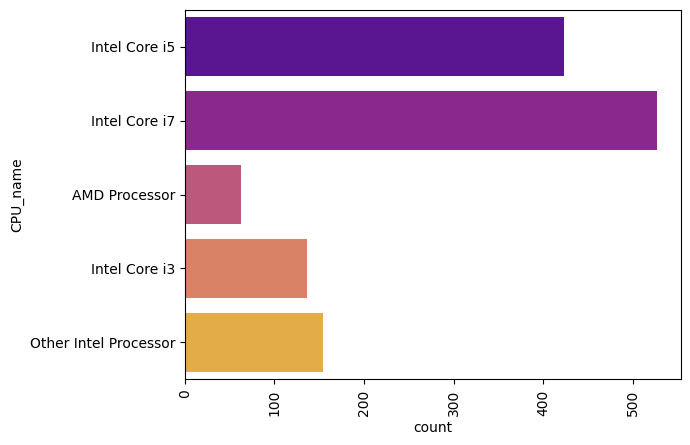

In [35]:
sns.countplot(data['CPU_name'],palette='plasma')
plt.xticks(rotation = 'vertical')

In [36]:
# price vs processor variation

sns.barplot(data['CPU_name'],data['Price'])
plt.xticks(rotation = 'vertical')

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [37]:

## dropping the cpu column

data.drop(columns=['Cpu'],inplace=True)
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<ipython-input-38-b2b225a74c40>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Ram'],palette='autumn')


<Axes: ylabel='count'>

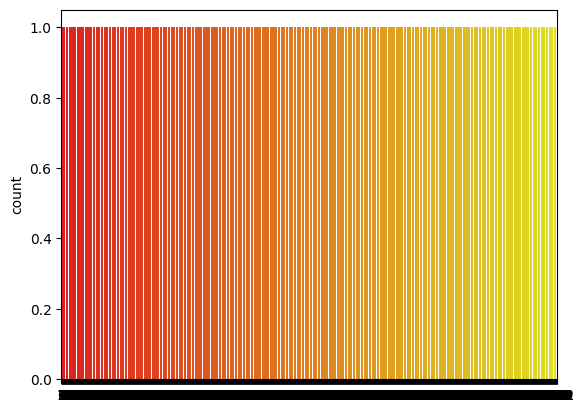

In [38]:
sns.countplot(data['Ram'],palette='autumn')


<Axes: xlabel='Ram', ylabel='Price'>

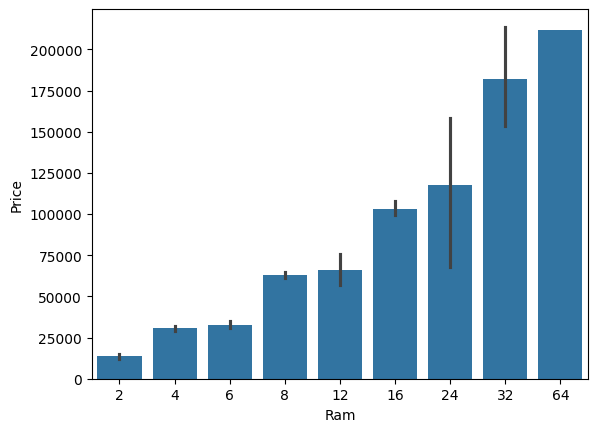

In [42]:
## ram is having good relation with price

sns.barplot(x='Ram', y='Price', data=data)


In [43]:
data['Memory'].iloc[:1][0]



'128GB SSD'

In [44]:
## 4 most common variants observed : HHD,SSD,Flash,Hybrid

# this expression will remove the decimal space for example 1.0 TB will be 1TB

data['Memory'] = data['Memory'].astype(str).replace('\.0','',regex = True)

# replace the GB word with " "

data['Memory'] = data['Memory'].str.replace('GB','')

# replace the TB word with "000"

data['Memory'] = data['Memory'].str.replace('TB','000')

# split the word accross the "+" character

newdf = data['Memory'].str.split("+",n = 1,expand = True)

newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [45]:
# we will strip up all the white spaces,basically eliminating white space

data['first'] = newdf[0]
data['first'] = data['first'].str.strip()
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


In [46]:
def applychanges(value):

    data['Layer1'+value] = data['first'].apply(lambda x:1 if value in x else 0)


listtoapply = ['HDD','SSD','Hybrid','FlashStorage']
for value in listtoapply:
    applychanges(value)


data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [47]:
# remove all the characters just keep the numbers

data['first'] = data['first'].str.replace(r'\D','')
data['first'].value_counts()

,count
first,
256 SSD,500
1000 HDD,225
128 SSD,172
512 SSD,138
500 HDD,132
32 Flash Storage,38
64 Flash Storage,16
2000 HDD,16
1000 SSD,16


In [48]:
data['Second'] = newdf[1]
data.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0,None


In [49]:
def applychanges1(value):

    data['Layer2'+value] = data['Second'].apply(lambda x:1 if value in x else 0)


listtoapply1 = ['HDD','SSD','Hybrid','FlashStorage']
data['Second'] = data['Second'].fillna("0")
for value in listtoapply1:
    applychanges1(value)


# remove all the characters just keep the numbers

data['Second'] = data['Second'].str.replace(r'\D','')
data['Second'].value_counts()

,count
Second,
0,1095
1000 HDD,185
2000 HDD,15
256 SSD,3
500 HDD,2
1000 Hybrid,2
512 SSD,1


In [50]:
data['first'] = data['first'].astype('int')
data['Second'] = data['Second'].astype('int')
data.head()

ValueError: invalid literal for int() with base 10: '128 SSD'

In [51]:
# multiplying the elements and storing the result in subsequent columns


data["HDD"]=(data["first"]*data["Layer1HDD"]+data["Second"]*data["Layer2HDD"])
data["SSD"]=(data["first"]*data["Layer1SSD"]+data["Second"]*data["Layer2SSD"])
data["Hybrid"]=(data["first"]*data["Layer1Hybrid"]+data["Second"]*data["Layer2Hybrid"])
data["Flash_Storage"]=(data["first"]*data["Layer1FlashStorage"]+data["Second"]*data["Layer2FlashStorage"])


## dropping of uncessary columns

data.drop(columns=['first', 'Second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1FlashStorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2FlashStorage'],inplace=True)

In [52]:
data.head(4)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,,128 SSD,,
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,,,,
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,,256 SSD,,
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,,512 SSD,,


In [53]:
data.drop(columns=['Memory'],inplace=True)
data.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
719,HP,Notebook,8,Nvidia GeForce 930MX,Windows 10,2.63,63936.0000,0,0,127.335675,Intel Core i7,,256 SSD,,
1090,Dell,Notebook,4,Intel HD Graphics,Linux,2.20,20965.1472,0,0,100.454670,Other Intel Processor,500 HDD,,,
15,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,80908.3440,0,1,226.983005,Intel Core i5,,256 SSD,,
912,Lenovo,Notebook,6,Nvidia GeForce 940MX,Windows 10,2.20,42037.9200,0,0,141.211998,Intel Core i7,,256 SSD,,
759,Acer,Notebook,4,Intel HD Graphics 620,Windows 10,2.10,31914.7200,0,0,100.454670,Intel Core i5,,256 SSD,,


In [54]:
data.drop(columns = ['Hybrid','Flash_Storage'],inplace=True)
data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,,128 SSD
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,,
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,,256 SSD
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,,512 SSD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,,256 SSD


In [55]:
data['Gpu'].value_counts()


,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [56]:
# this is what we will be doing,extracting the brands
a = data['Gpu'].iloc[1]
print(a.split()[0])

Intel


<ipython-input-57-bb72ac4ce997>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Gpu brand'],palette='plasma')


<Axes: xlabel='count', ylabel='Gpu brand'>

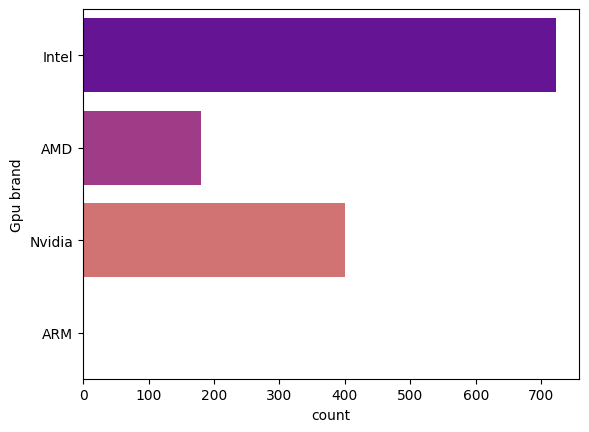

In [57]:
data['Gpu brand'] = data['Gpu'].apply(lambda x:x.split()[0])
sns.countplot(data['Gpu brand'],palette='plasma')

<ipython-input-58-3bcbfd6db513>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['Gpu brand'],palette='plasma')


<Axes: xlabel='count', ylabel='Gpu brand'>

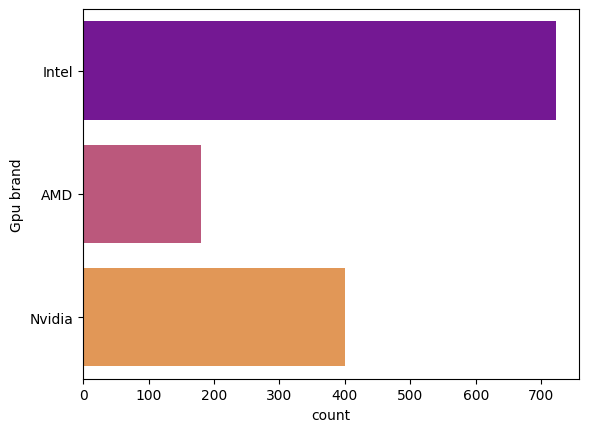

In [58]:
# removing the "ARM" tuple

data = data[data['Gpu brand']!='ARM']
sns.countplot(data['Gpu brand'],palette='plasma')

<Axes: xlabel='Gpu brand', ylabel='Price'>

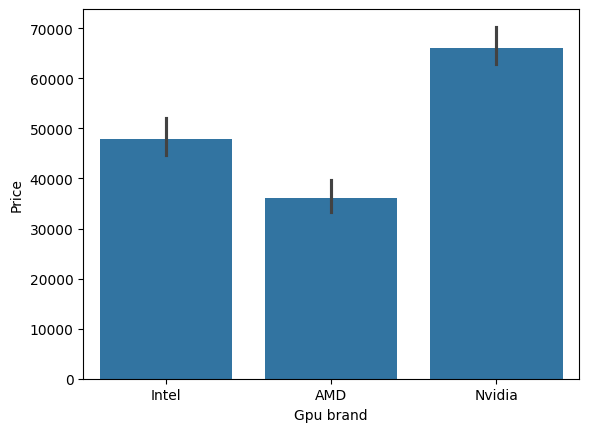

In [60]:
# price-GPU analysis,i used np.median inorder to check if there is any
# inpact of outlier or not

sns.barplot(x='Gpu brand',y='Price',
            data = data, estimator=np.median)

In [61]:
data['OpSys'].value_counts()


,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


In [62]:
data['OpSys'].unique()


array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [63]:
# club {Windows 10,Windows 7,Windows 7 S}-->Windows
# club {macOS,mac OS X}--> mac
# else return Others

def setcategory(text):

    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'

    elif text=='Mac OS X' or text=='macOS':
        return 'Mac'

    else:
        return 'Other'


data['OpSys'] = data['OpSys'].apply(lambda x:setcategory(x))

data.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,,128 SSD,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,,,Intel
2,HP,Notebook,8,Intel HD Graphics 620,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,,256 SSD,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,,512 SSD,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,,256 SSD,Intel


<ipython-input-64-8a1f5d87e7fe>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['OpSys'],palette='plasma')


<Axes: xlabel='count', ylabel='OpSys'>

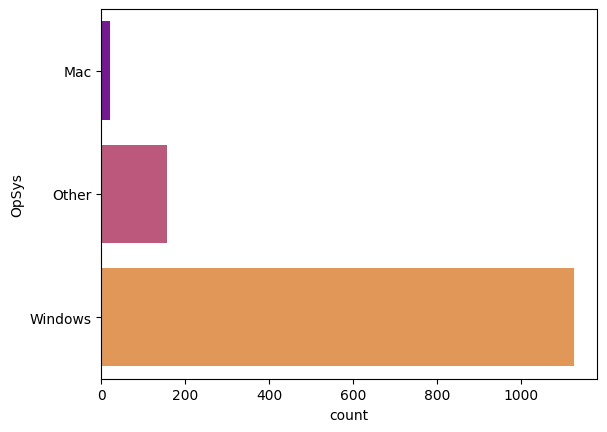

In [64]:
sns.countplot(data['OpSys'],palette='plasma')


([0, 1, 2], [Text(0, 0, 'Mac'), Text(1, 0, 'Other'), Text(2, 0, 'Windows')])

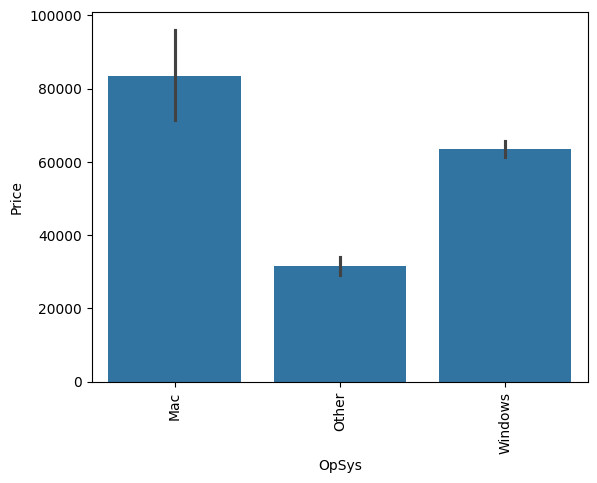

In [65]:
sns.barplot(x = data['OpSys'],y = data['Price'])
plt.xticks(rotation = 'vertical')

<ipython-input-66-663d24e924fe>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

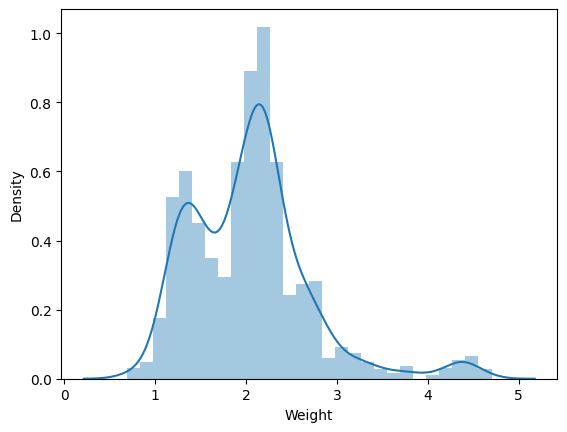

In [66]:
sns.distplot(data['Weight'])


<ipython-input-69-049e7ab17fe1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Price'])


<Axes: xlabel='Price', ylabel='Density'>

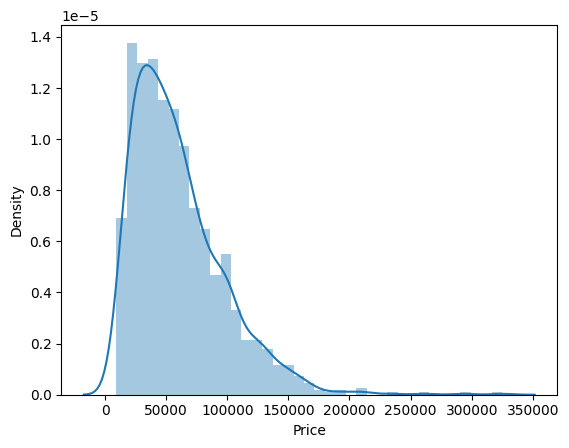

In [69]:
sns.distplot(data['Price'])


<ipython-input-70-a3cbc290b526>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(data['Price']))


<Axes: xlabel='Price', ylabel='Density'>

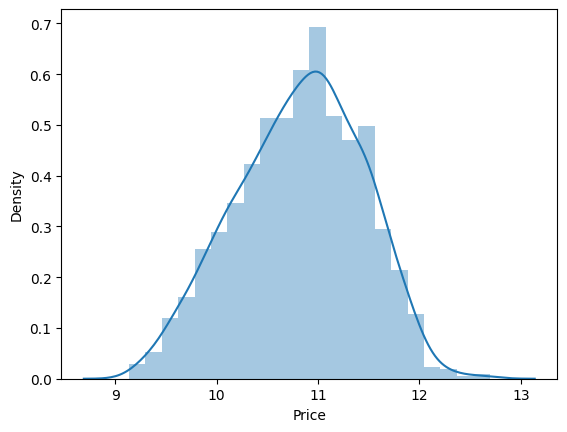

In [70]:
# so if we apply np.log to the Price col we get a gaussian distibution

sns.distplot(np.log(data['Price']))

# Model Building


In [72]:
y = np.log(data['Price'])
X = data.drop(['Price'],axis = 1)

In [73]:
y

,Price
0,11.175755
1,10.776777
2,10.329931
3,11.814476
4,11.473101
...,...
1298,10.433899
1299,11.288115
1300,9.409283
1301,10.614129


In [74]:
X

,Company,TypeName,Ram,Gpu,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,Mac,1.37,0,1,226.983005,Intel Core i5,,128 SSD,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,Mac,1.34,0,0,127.677940,Intel Core i5,,,Intel
2,HP,Notebook,8,Intel HD Graphics 620,Other,1.86,0,0,141.211998,Intel Core i5,,256 SSD,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,Mac,1.83,0,1,220.534624,Intel Core i7,,512 SSD,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,Mac,1.37,0,1,226.983005,Intel Core i5,,256 SSD,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows,1.80,1,1,157.350512,Intel Core i7,,128 SSD,Intel
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows,1.30,1,1,276.053530,Intel Core i7,,512 SSD,Intel
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows,1.50,0,0,111.935204,Other Intel Processor,,,Intel
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows,2.19,0,0,100.454670,Intel Core i7,1000 HDD,,AMD


In [75]:

# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [77]:
corr_features = correlation(X.select_dtypes(exclude="object"), 0.8)
len(set(corr_features))

0

In [78]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=32)


In [79]:
X_train.shape, X_test.shape

((1041, 13), (261, 13))

In [80]:
num_features = X_train.select_dtypes(exclude="object")
cat_features = X_train.select_dtypes(include="object")

In [81]:
num_features

,Ram,Weight,TouchScreen,IPS,PPI
725,4,1.90,0,0,100.454670
424,16,4.42,0,1,169.780899
396,8,2.10,0,1,141.211998
49,4,2.80,0,0,90.583402
195,8,2.50,0,1,127.335675
...,...,...,...,...,...
1095,8,2.40,0,0,141.211998
252,4,1.68,0,0,100.454670
88,16,2.20,0,1,141.211998
892,8,1.17,0,0,146.860478


In [82]:
cat_features

,Company,TypeName,Gpu,OpSys,CPU_name,HDD,SSD,Gpu brand
725,Lenovo,Notebook,Intel HD Graphics 620,Other,Intel Core i5,1000 HDD,,Intel
424,Dell,Gaming,Nvidia GeForce GTX 1070,Windows,Intel Core i7,1000 HDD,256 SSD,Nvidia
396,Lenovo,Notebook,AMD Radeon RX 550,Windows,Intel Core i7,,256 SSD,AMD
49,Asus,Notebook,Nvidia GeForce 920MX,Windows,Other Intel Processor,1000 HDD,,Nvidia
195,HP,Notebook,Nvidia GeForce 930MX,Windows,Intel Core i5,1000 HDD,,Nvidia
...,...,...,...,...,...,...,...,...
1095,Acer,Notebook,Nvidia GeForce GTX 950M,Windows,Intel Core i5,1000 HDD,256 SSD,Nvidia
252,Asus,Notebook,AMD Radeon R5 M420,Windows,AMD Processor,1000 HDD,,AMD
88,Asus,Gaming,Nvidia GeForce GTX 1060,Windows,Intel Core i7,1000 HDD,128 SSD,Nvidia
892,Samsung,Ultrabook,Intel HD Graphics 620,Windows,Intel Core i7,,256 SSD,Intel


In [87]:

step1 = ColumnTransformer(
    transformers=[
        ('col_tnf', OneHotEncoder(drop='first', handle_unknown='ignore'),cat_features.columns),
        ('num_tnf', StandardScaler(), num_features.columns)
    ],
    remainder='passthrough'
)

In [88]:
step1

ColumnTransformer(remainder='passthrough',
                  transformers=[('col_tnf',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 Index(['Company', 'TypeName', 'Gpu', 'OpSys', 'CPU_name', 'HDD', 'SSD',
       'Gpu brand'],
      dtype='object')),
                                ('num_tnf', StandardScaler(),
                                 Index(['Ram', 'Weight', 'TouchScreen', 'IPS', 'PPI'], dtype='object'))])

In [94]:
# Function to evaluate regression model
def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Regression metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    explained_var = explained_variance_score(y_test, y_pred)

    # Calculate adjusted R-squared
    n = len(y_test)
    p = X_test.shape[1]  # Number of features
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    return r2, adj_r2, mse, mae, explained_var

# Initialize different regression models
regression_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'AdaBoost Regressor': AdaBoostRegressor(),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Bayesian Ridge': BayesianRidge(),
    'Huber Regressor': HuberRegressor(),
    # 'Passive Aggressive Regressor': PassiveAggressiveRegressor(),
    'MLP Regressor': MLPRegressor(),
    'Extra Trees Regressor': ExtraTreesRegressor(),
    'Bagging Regressor': BaggingRegressor(),
    'XGBoost Regressor': XGBRegressor(),
    'LightGBM Regressor': LGBMRegressor(),
     'MLP Regressor' : MLPRegressor(hidden_layer_sizes=(100, ), max_iter=500),

}

# Update your pipeline and evaluation loop
results = []
for model_name, model in tqdm(regression_models.items()):
    try:
        r2, adj_r2, mse, mae, explained_var = evaluate_regression_model(model, X_train, y_train, X_test, y_test)
        results.append([model_name, r2, adj_r2, mse, mae, explained_var])
    except Exception as e:
        print(f"Error with model {model_name}: {e}")

# Print results
headers = ["Model", "R-squared", "Adjusted R-squared", "Mean Squared Error", "Mean Absolute Error", "Explained Variance"]
print(tabulate(results, headers, tablefmt="grid"))

  0%|          | 0/17 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
 12%|█▏        | 2/17 [00:00<00:01, 12.57it/s]/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
 24%|██▎       |

Error with model Bayesian Ridge: Sparse data was passed for X, but dense data is required. Use '.toarray()' to convert to a dense numpy array.


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
 71%|███████   | 12/17 [00:06<00:01,  2.86it/s]/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
 76%|███████▋  | 13/17 [00:14<00:08,  2.03s/it]/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_en

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 237
[LightGBM] [Info] Number of data points in the train set: 1041, number of used features: 43
[LightGBM] [Info] Start training from score 10.821263
+-------------------------------+-------------+----------------------+----------------------+-----------------------+----------------------+
| Model                         |   R-squared |   Adjusted R-squared |   Mean Squared Error |   Mean Absolute Error |   Explained Variance |
+===============================+=============+======================+======================+=======================+======================+
| Linear Regression             |  0.853795   |            0.8461    |            0.0535182 |              0.188412 |             0.853931 |
+------------------------------

  0%|          | 0/1 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [2, 5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
100%|██████████| 1/1 [00:01<00:00,  1.32s/it]


+--------------------------+-------------+----------------------+----------------------+-----------------------+----------------------+
| Model                    |   R-squared |   Adjusted R-squared |   Mean Squared Error |   Mean Absolute Error |   Explained Variance |
+==========================+=============+======================+======================+=======================+======================+
| Support Vector Regressor |    0.894658 |             0.889114 |            0.0385605 |              0.150604 |             0.894942 |
+--------------------------+-------------+----------------------+----------------------+-----------------------+----------------------+


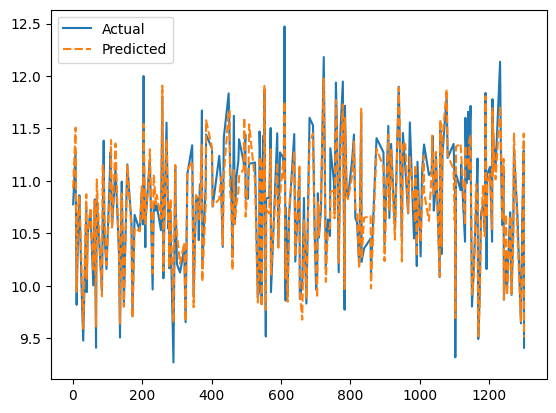

In [95]:
# Function to evaluate regression model
def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    pipe = Pipeline([
        ('Transform', step1),  # You need to define the 'step1' transformer
        ('model', model),
    ])

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    # Regression metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    explained_var = explained_variance_score(y_test, y_pred)

    # Calculate adjusted R-squared
    n = len(y_test)
    p = X_test.shape[1]  # Number of features
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
    diff = pd.DataFrame(
{
    'Actual':y_test,
    'Predicted':y_pred
})

    sns.lineplot(data= diff)

    return r2, adj_r2, mse, mae, explained_var

# Initialize different regression models
regression_models = {

    'Support Vector Regressor': SVR(),


}

# Create a list to store the results
results = []

# Evaluate and print regression metrics for different models
for model_name, model in tqdm(regression_models.items()):
    r2, adj_r2, mse, mae, explained_var = evaluate_regression_model(model, X_train, y_train, X_test, y_test)
    results.append([model_name, r2, adj_r2, mse, mae, explained_var])

# Print the results in a tabular form
headers = ["Model", "R-squared", "Adjusted R-squared", "Mean Squared Error", "Mean Absolute Error", "Explained Variance"]
print(tabulate(results, headers, tablefmt="grid"))